# The Virgo Database

We are going to extract data from the [Virgo Database](http://virgo.dur.ac.uk/data.php), in particular from the [millimil](http://galaxy-catalogue.dur.ac.uk:8080/Millennium/) for which is not necessary to register. The millimil has been run in a cubic box of comovin side of $62.5 {\rm Mpc}/h$ with dark matter particles with a minnimum mass of $0.86*10^9 {\rm M}_{\odot}/h$. The assumed cosmological parameters in this simulation are: $\Omega_0 = 0.25$, $\Lambda _0 = 0.75$, $\Omega _b = 0.045$ and $h_0 = 0.73$, as for the [Millennium Simulation](https://arxiv.org/abs/astro-ph/0504097).


### Q.1 What kind of data can  you find in the [Virgo Database](http://virgo.dur.ac.uk/data.php)?

The information in Databases is sorted in tables. The data from a given table can be retrived using SQL. A good tutorial on SQL can be found [here](https://www.codeschool.com/courses/try-sql). The Virgo Database has a SQL query form, where queries can be directly typed:
<img src="images/queryform.png">

Some demo queries are provided in the Database and [McAlpine et al. 2016](https://arxiv.org/abs/1510.01320) contains a lot of good examples.

This is the information about the "Snapshots" table:
<img src="images/snapshots.png">

Try out the following SQL query in the millimil query form, which downloads the redshift and snapshot numbers from the "Snapshots" table:

``` mysql
SELECT redshift, snapnum
FROM snapshots; 
```

The "where" clause is used in SQL to specify a condition. For example, to get all the information in the "Snapshots" table that corresponds to a snapshot number of 19:

``` mysql
SELECT *
FROM snapshots
WHERE snapnum = 19 ; 
```

#### Q.2 What is the snapshot number that corresponds to $z=0$?

#### Q.3 Explore the table [MPAhalo](http://virgodb.dur.ac.uk:8080/Millennium/Help?page=databases/millimil/mpahalo) and make an SQL to get the number of simulation particles in halos at $z=0$. What is the minimum and maximum number of particles you find in a halo? Use the SQL command 'order by' to find out the answer. 

#### Q.4 Modify the above query changing the name of the variable, by using "select np as nparticles" and modifying the ordering command accordingly.

#### Q.5 Modify your last query to also get one direct measure of the halo masses as $log_{10}({\rm Mass/M}_{\odot}h^{-1})$. To take logarithms in base 10 in SQL use the function 'log10'. You might need to ensure that what goes into the logarithm is above 0. Is the mass for the halo with the smallest number of particles what you expected?

In this two works you can find a comparisson of halo masses defined in different ways and how this affect the results when populating them with galaxies: [Jiang et al. 2015](https://arxiv.org/abs/1311.6649) and [Knebe et al. 2015](https://arxiv.org/abs/1505.04607).


## SQL queries using python

The same queries can be done using [python](https://docs.python.org/3/tutorial/). There are several packages to do so, including the one specifically created for the [Virgo Database](http://virgo.dur.ac.uk/data.php): eagleSqlTools.py. This package requires numpy and needs to be imported in your python program. We will also make a plot, so import matplotlib.

In [33]:
import numpy as np
import eagleSqlTools as sql
from matplotlib import pyplot as plt
%matplotlib notebook

Next a connection needs to be defined, including a username ("xyz"), password ("abc") and link to the [Database](http://virgodb.dur.ac.uk:8080/Millennium): 

In [34]:
con = sql.connect("xyz", "abc", url="http://virgodb.dur.ac.uk:8080/Millennium")

The SQL is defined as a string (spaces do not matter here) and can be run as follows: 

In [35]:
the_query = """SELECT * 
               FROM snapshots 
               WHERE snapnum = 19 ;"""

data = con.execute_query(the_query)
print type(data)

<type 'numpy.ndarray'>


To easily access the outcome from the query, a name can be given to each downloaded value:

In [36]:
the_query = """SELECT redshift as redshift, snapnum as snapnum
               FROM snapshots ;"""

data = con.execute_query(the_query)
redshift = data["redshift"]
snapnum  = data["snapnum"]

print np.min(redshift),np.max(redshift)

0.0 127.0


As a test plot, let's plot the snapshot number as a function of redshift, using matplotlib. First we define the labels of the axis and set the figure (so we can save it later):

Next, let's only show redshift up to 10:

<IPython.core.display.Javascript object>


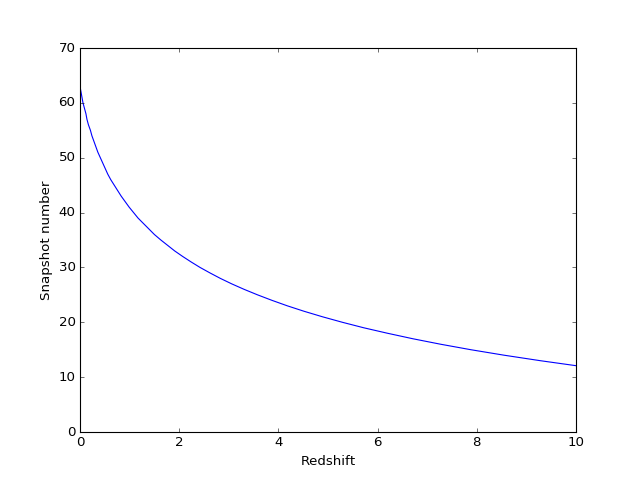

In [37]:
ytit ='Snapshot number'
xtit ='Redshift'

fig = plt.figure(1)
plt.xlabel(xtit) ; plt.ylabel(ytit)
plt.xlim(0.,10.)

plt.plot(redshift,snapnum)
plt.show()

Save the as a pdf file, 'z_snap.pdf'.

In [38]:
plotfile = 'z_snap.pdf'
fig.savefig(plotfile)

The information retrived from the SQL query, 'data', can be stored into a file, 'z_snap.txt', using for example savetxt from numpy:

In [39]:
outfile = 'z_snap.txt'
with open(outfile,'w') as outf:
    outf.write('# redshift, snapshot number \n')
    np.savetxt(outf,data)
    outf.closed
print 'Output file:', outfile

Output file: z_snap.txt


#### Q.6 What is the structure of this output file compared to what you get directly from making the query on line? 

Read the readshift from the output file:

In [40]:
read_snap = np.loadtxt(outfile, usecols=(1,), unpack=True)
print read_snap

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.]


#### Q.7 Using the SQL queries you performed at the beginning, modify the code above to produce a file with the number of simulation particles in haloes and one measurement of their mass at $z=0$, from the table [MPAhalo](http://virgodb.dur.ac.uk:8080/Millennium/Help?page=databases/millimil/mpahalo) and plot the masses derived from the number of particles versus the other measure of mass that  you have download, both in units of $log_{10}({\rm Mass/M}_{\odot}h^{-1})$.